In [278]:
from scipy import constants as C
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym
import matplotlib.colors as mcolors

In [279]:
def Data(l:str):
    direccion = l
    data = pd.read_csv(direccion, delimiter='\t')
    return data

def GetFit(x,y,n):
    
    l = x.shape[0]
    b = y
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b)
    
    xsol = np.linalg.solve(AT,bT)
    
    return xsol

def GetModel(x,p):
    y = 0
    for n in range(len(p)):
        y += p[n]*x**n
        
    return y

def GetError(x,y,p):
    n=2
    N=3
    l = x.shape[0]
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
    
    # Residuos
    A=A[:,1:3]
    R = y - np.dot(A,p)
    sigma2 = np.dot( R.T, R )/(N-len(p))
    CVar = sigma2*np.linalg.inv(np.dot(A.T,A))
    
    Barras_error_xy=np.diag(CVar)
    Incertidumbre=np.sqrt(np.diag(CVar))
    return (Barras_error_xy,Incertidumbre)


#_x = np.linspace(np.min(x),np.max(x),2)
#param = GetFit(x,y)
#ym = GetModel(_x,param)
#plt.errorbar(V, n1,xerr=5.25,yerr=0.015,capsize=0.5,color='r',fmt='.',label = "n=1")
#plt.text(450, 0.35, 'y={}x + {}'.format(round(param[1],2),round(param[0],2)))

In [280]:
Datos_1=Data(""r"C:\Users\aleja\OneDrive\Documentos\Física\Moderna imágenes\Carga em nuevo_1.txt")
Datos_1['Campo_T']=Datos_1['Campo']*(10**(-3))
Datos_1

,Corriente,Campo,Campo_T
0,1.1,0.05,0.00005
1,1.5,0.06,0.00006
2,2.6,0.07,0.00007
3,3.6,0.10,0.00010
4,4.3,0.11,0.00011
5,5.9,0.13,0.00013
6,6.7,0.15,0.00015
7,7.7,0.17,0.00017
8,8.2,0.22,0.00022
9,9.4,0.23,0.00023


(array([8.38960206e-07, 7.02348187e-09]), array([9.15947709e-04, 8.38062162e-05]))


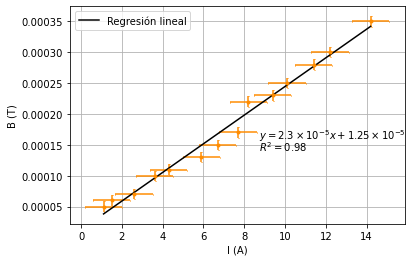

In [290]:
_x = np.linspace(np.min(Datos_1['Corriente']),np.max(Datos_1['Corriente']),2)
param = GetFit(Datos_1['Corriente'],Datos_1['Campo_T'],1)
ym = GetModel(_x,param)
Estadistica=GetError(Datos_1['Corriente'],Datos_1['Campo_T'],param)
print(Estadistica)

plt.errorbar(Datos_1['Corriente'],Datos_1['Campo_T'],fmt='.',color='#FF8C00',xerr=9.15e-1,yerr=8.38e-6,capsize=0.5)
plt.plot(_x,ym,color='k',label='Regresión lineal')
plt.text(8.7, 0.00016, r'$y=2.3 \times 10^{-5} x + 1.25 \times 10^{-5}$',color='k')
plt.text(8.7, 0.00014, r'$R^2=0.98$',color='k')

plt.grid()
plt.xlabel('I (A)')
plt.ylabel('B (T)')
plt.legend()

In [289]:

print('Los valores de las barras de error son:{} y las incertidumbres {}.'.format(Estadistica[0],Estadistica[1]))

Los valores de las barras de error son:[8.38960206e-07 7.02348187e-09] y las incertidumbres [9.15947709e-04 8.38062162e-05].


In [282]:
#Constantes
R=0.2 #m
N=154 
a=(5/4)**(3/2)
 
#Valor teórico
B_I_t=(N*C.mu_0)/(R*a)

#Función de B(I)
def B(B_I,I):
    return B_I*I

B_Teorico=B(B_I_t,Datos_1['Corriente'])

#Valor experimental dada la regresión
B_I_Exp=param[1]
B_Experimental=B(B_I_Exp,Datos_1['Corriente'])

B_Experimental

0     0.000026
1     0.000035
2     0.000060
3     0.000084
4     0.000100
5     0.000137
6     0.000155
7     0.000179
8     0.000190
9     0.000218
10    0.000234
11    0.000264
12    0.000283
13    0.000329
Name: Corriente, dtype: float64

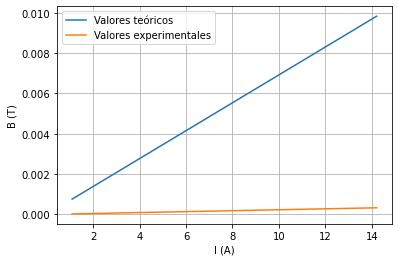

In [283]:
plt.plot(Datos_1['Corriente'],B_Teorico,label='Valores teóricos')
plt.plot(Datos_1['Corriente'],B_Experimental,label='Valores experimentales')

plt.grid()
plt.xlabel('I (A)')
plt.ylabel('B (T)')
plt.legend()

In [284]:
Datos_2=Data(""r"C:\Users\aleja\OneDrive\Documentos\Física\Moderna imágenes\Carga em nuevo_2.txt")

Datos_2['B_4']=B(B_I_Exp,Datos_2['I_4'])**2

Datos_2['B_6']=B(B_I_Exp,Datos_2['I_6'])**2

Datos_2['B_8']=B(B_I_Exp,Datos_2['I_8'])**2

Datos_2['B_10']=B(B_I_Exp,Datos_2['I_10'])**2

Datos_2

,V,I_4,I_6,I_8,I_10,B_4,B_6,B_8,B_10
0,100,13.5,0.7,3.9,0.0,9.809442e-08,2.637381e-10,8.186645e-09,0.000000e+00
1,125,21.6,13.1,9.6,0.0,2.511217e-07,9.236753e-08,4.960429e-08,0.000000e+00
2,150,25.6,15.5,12.1,8.8,3.527416e-07,1.293124e-07,7.880386e-08,4.168138e-08
3,175,27.9,17.4,12.9,10.0,4.189721e-07,1.629578e-07,8.956868e-08,5.382410e-08
4,200,29.6,19.6,14.0,10.9,4.715852e-07,2.067706e-07,1.054952e-07,6.394841e-08
5,225,0.0,20.2,15.0,11.9,0.000000e+00,2.196238e-07,1.211042e-07,7.622030e-08
6,250,0.0,21.3,16.2,12.7,0.000000e+00,2.441945e-07,1.412560e-07,8.681289e-08
7,275,0.0,22.6,17.0,13.4,0.000000e+00,2.749120e-07,1.555516e-07,9.664655e-08


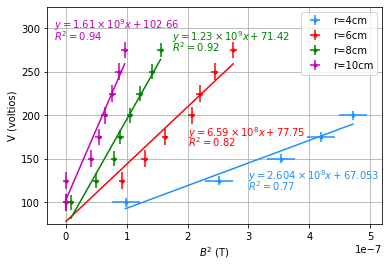

In [285]:
_x1 = np.linspace(np.min(Datos_2['B_4'][0:5]),np.max(Datos_2['B_4'][0:5]),10)
param_1 = GetFit(Datos_2['B_4'][0:5],Datos_2['V'][0:5],1)
ym_1 = GetModel(_x1,param_1)
Estadistica_1=GetError(Datos_2['B_4'][0:5],Datos_2['V'][0:5],param_1)

plt.errorbar(Datos_2['B_4'][0:5],Datos_2['V'][0:5],fmt='.',color='#1E90FF',label='r=4cm',xerr=2.29e-8,yerr=5.23,capsize=0.05)
plt.plot(_x1,ym_1,color='#1E90FF')
plt.text(3e-7, 126, r'$y=2.604 \times 10^8 x + 67.053$',color='#1E90FF')
plt.text(3e-7, 114, r'$R^2=0.77$',color='#1E90FF')


_x2 = np.linspace(np.min(Datos_2['B_6']),np.max(Datos_2['B_6']),10)
param_2 = GetFit(Datos_2['B_6'],Datos_2['V'],1)
ym_2 = GetModel(_x2,param_2)
Estadistica_2=GetError(Datos_2['B_6'],Datos_2['V'],param_2)

plt.errorbar(Datos_2['B_6'],Datos_2['V'],fmt='.',color='r',label='r=6cm',xerr=0.054e-7,yerr=9.54,capsize=0.05)
plt.plot(_x2,ym_2,color='r')
plt.text(2e-7, 176, r'$y=6.59 \times 10^8 x + 77.75$',color='r')
plt.text(2e-7, 164, r'$R^2=0.82$',color='r')

_x3 = np.linspace(np.min(Datos_2['B_8']),np.max(Datos_2['B_8']),10)
param_3 = GetFit(Datos_2['B_8'],Datos_2['V'],1)
ym_3 = GetModel(_x3,param_3)
Estadistica_3=GetError(Datos_2['B_6'],Datos_2['V'],param_3)

plt.errorbar(Datos_2['B_8'],Datos_2['V'],fmt='.',color='g',label='r=8cm',xerr=0.054e-7,yerr=8.54,capsize=0.05)
plt.plot(_x3,ym_3,color='g')
plt.text(1.75e-7, 286, r'$y=1.23 \times 10^9 x + 71.42$',color='g')
plt.text(1.75e-7, 274, r'$R^2=0.92$',color='g')

_x4 = np.linspace(np.min(Datos_2['B_10']),np.max(Datos_2['B_10']),10)
param_4 = GetFit(Datos_2['B_10'],Datos_2['V'],1)
ym_4 = GetModel(_x4,param_4)
Estadistica_4=GetError(Datos_2['B_6'],Datos_2['V'],param_4)

plt.errorbar(Datos_2['B_10'],Datos_2['V'],fmt='.',color='m',label='r=10cm',xerr=0.054e-7,yerr=9.54,capsize=0.05)
plt.plot(_x4,ym_4,color='m')
plt.text(-0.2e-7, 300, r'$y=1.61 \times 10^9 x + 102.66$',color='m')
plt.text(-0.2e-7, 286, r'$R^2=0.94$',color='m')

plt.ylabel('V (voltios)')
plt.xlabel(r'$B^2$ (T)')
plt.ylim(75,325)
plt.legend()
plt.grid()

In [286]:
#Valores de las barras de error y respectivas incertidumbres
print('Los valores de las barras de error son:{} y las incertidumbres {}.'.format(Estadistica_1[0],Estadistica_1[1]))
print('Los valores de las barras de error son:{} y las incertidumbres {}.'.format(Estadistica_2[0],Estadistica_2[1]))
print('Los valores de las barras de error son:{} y las incertidumbres {}.'.format(Estadistica_3[0],Estadistica_3[1]))
print('Los valores de las barras de error son:{} y las incertidumbres {}.'.format(Estadistica_4[0],Estadistica_4[1]))

Los valores de las barras de error son:[5.30728344e+18 3.16364258e+31] y las incertidumbres [2.30375420e+09 5.62462672e+15].
Los valores de las barras de error son:[2.54077919e+19 4.87818730e+32] y las incertidumbres [5.04061424e+09 2.20866188e+16].
Los valores de las barras de error son:[2.54077861e+19 4.87818620e+32] y las incertidumbres [5.04061366e+09 2.20866163e+16].
Los valores de las barras de error son:[2.54077806e+19 4.87818515e+32] y las incertidumbres [5.04061312e+09 2.20866139e+16].


In [292]:
#Relaciones de cada radio
em4=param_1[1]*(2/0.4)
em6=param_2[1]*(2/0.6)
em8=param_3[1]*(2/0.8)
em10=param_4[1]*(2/0.10)

print(em4)
print(em6)
print(em8)
print(em10)
print(np.sum([em4,em6,em8,em10])/4)

1302130755.5628107
2199676285.09231
3097145727.7379904
32385562613.516296
9746128845.477352


In [291]:
#Desviaciones estándar de las pendientes
print(np.std([em4,em6,em8,em10]))

13086280868.01238
